# ขั้นตอน 1: นำเข้าชุดข้อมูล

In [1]:
from google.colab import files
files.upload()  # อัปโหลดไฟล์ kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nattakanlamtem","key":"ff4745c67bc73c10690ff47d4ff7a660"}'}

In [2]:
# สร้างโฟลเดอร์ .kaggle ในระบบ
!mkdir -p ~/.kaggle

# คัดลอกไฟล์ kaggle.json ไปยังโฟลเดอร์ .kaggle
!cp kaggle.json ~/.kaggle/

# กำหนด permission ให้กับไฟล์ kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets list


ref                                                          title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          10447        193  1.0              
lainguyn123/student-performance-factors                      Student Performance Factors                     94KB  2024-09-02 10:53:57          39148        678  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset                    22KB  2024-10-06 11:27:38           5303         95  1.0              
jaseemck/paralympics-2024                                    Paralympics 2024                       

In [6]:
!kaggle datasets list -p 2

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
mafzal19/electric-vehicle-sales-by-state-in-india               Electric Vehicle Sales by State in India            453KB  2024-10-11 18:59:45           1792         29  1.0              
sachinkumar62/phone-price-prediction-dataset                    Phone Price Prediction Dataset                       13MB  2024-10-06 17:39:10            953         31  1.0              
ankulsharma150/marketing-analytics-project                      Marketing Analytics Project                          38KB  2024-10-01 09:27:22           1896         35  1.0              
umerhaddii/walmart-stock-data-2024                          

In [8]:
!kaggle datasets list -s "imdb-5000" #search for imdb

ref                                                        title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
carolzhangdc/imdb-5000-movie-dataset                       IMDB 5000 Movie Dataset                             554KB  2017-12-16 06:54:20          43807        349  0.44117647       
rakkesharv/imdb-5000-movies-multiple-genres-dataset        IMDb 5000+ Movies & Multiple Genres Dataset         288KB  2022-10-29 04:14:32           2709         41  1.0              
carolzhangdc/imdb-5000                                     IMDB 5000                                           554KB  2017-12-16 07:00:21            962          8  0.4117647        
suchitgupta60/imdb-data                                    IMDB Data                 

In [9]:
!kaggle datasets download -d carolzhangdc/imdb-5000-movie-dataset # selected this data for cleaning


Dataset URL: https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset
License(s): DbCL-1.0
  0% 0.00/554k [00:00<?, ?B/s]
100% 554k/554k [00:00<00:00, 108MB/s]


In [10]:
!unzip imdb-5000-movie-dataset.zip


Archive:  imdb-5000-movie-dataset.zip
  inflating: movie_metadata.csv      


In [12]:
import pandas as pd

# โหลดข้อมูลจากไฟล์ CSV
movies_df = pd.read_csv('movie_metadata.csv')

# ดูข้อมูล 5 แถวแรก
movies_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# ขั้นตอน 2: สำรวจข้อมูลเบื้องต้น (EDA)


In [17]:
# ตรวจสอบข้อมูลเบื้องต้น
movies_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [19]:
# ตรวจสอบค่า missing values
movies_df.isnull().sum()


,0
color,19
director_name,104
num_critic_for_reviews,50
duration,15
director_facebook_likes,104
actor_3_facebook_likes,23
actor_2_name,13
actor_1_facebook_likes,7
gross,884
genres,0


In [20]:
# ดูข้อมูลสถิติ
movies_df.describe(include='all')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,...,5022.000000,5029,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,NaN,46,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


# ขั้นตอน 3: ทำการล้างข้อมูล


3.1 จัดการค่า Missing Values


In [24]:
# Check the missing values for each column again for clarity
missing_values = movies_df.isnull().sum()
print(missing_values)

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


In [26]:
# Drop rows where critical columns like 'movie_title' or 'imdb_score' are missing
movies_df_cleaned = movies_df.dropna(subset=['movie_title', 'imdb_score'])
movies_df_cleaned

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [27]:
# For this case, let's fill missing values in 'budget', 'gross', and 'title_year' with their respective mean values
movies_df_cleaned['budget'] = movies_df_cleaned['budget'].fillna(movies_df_cleaned['budget'].mean())
movies_df_cleaned['gross'] = movies_df_cleaned['gross'].fillna(movies_df_cleaned['gross'].mean())
movies_df_cleaned['title_year'] = movies_df_cleaned['title_year'].fillna(movies_df_cleaned['title_year'].mean())


In [28]:
# Drop rows where other important values like 'duration', 'director_name', or 'country' are missing
movies_df_cleaned = movies_df_cleaned.dropna(subset=['duration', 'director_name', 'country'])


In [34]:
# Check how much data is cleaned
missing_values_after_cleaning = movies_df_cleaned.isnull().sum()



In [31]:
missing_values

,0
color,19
director_name,104
num_critic_for_reviews,50
duration,15
director_facebook_likes,104
actor_3_facebook_likes,23
actor_2_name,13
actor_1_facebook_likes,7
gross,884
genres,0


In [32]:
missing_values_after_cleaning

,0
color,15
director_name,0
num_critic_for_reviews,40
duration,0
director_facebook_likes,0
actor_3_facebook_likes,17
actor_2_name,10
actor_1_facebook_likes,7
gross,0
genres,0


In [33]:
movies_df_cleaned.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


เราได้ทำการจัดการกับ missing values บางส่วนในคอลัมน์สำคัญเรียบร้อยแล้ว:

- ลบแถวที่ไม่มีชื่อภาพยนตร์หรือคะแนน IMDb (imdb_score)
- เติมค่าเฉลี่ยให้กับคอลัมน์ที่เป็นตัวเลข เช่น budget, gross, และ title_year
- ลบแถวที่ไม่มีข้อมูลสำคัญอื่นๆ เช่น duration, director_name, และ country

# จัดการกับข้อมูลประเภทหนัง (Genres)
- เราจะใช้ One-Hot Encoding เพื่อแยกประเภทหนังออกเป็นคอลัมน์
- ตรวจสอบและจัดการข้อมูลที่เหลือ เช่น ข้อมูลที่ซ้ำซ้อนหรือค่าผิดปกติ

In [35]:
print(movies_df_cleaned['genres'].head())

0    Action|Adventure|Fantasy|Sci-Fi
1           Action|Adventure|Fantasy
2          Action|Adventure|Thriller
3                    Action|Thriller
5            Action|Adventure|Sci-Fi
Name: genres, dtype: object


In [36]:
# One-Hot Encoding the 'genres' column

# Split genres column by '|' and create dummy variables for each genre
movies_df_cleaned['genres'] = movies_df_cleaned['genres'].str.split('|')



<ipython-input-36-572727962f76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df_cleaned['genres'] = movies_df_cleaned['genres'].str.split('|')


In [37]:
print(movies_df_cleaned['genres'].head())

0    [Action, Adventure, Fantasy, Sci-Fi]
1            [Action, Adventure, Fantasy]
2           [Action, Adventure, Thriller]
3                      [Action, Thriller]
5             [Action, Adventure, Sci-Fi]
Name: genres, dtype: object


In [39]:
# Explode the genres column so each genre gets its own row
movies_df_cleaned_exploded = movies_df_cleaned.explode('genres')
movies_df_cleaned_exploded

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,Action,...,3054.0,English,USA,PG-13,2.370000e+08,2009.0,936.0,7.9,1.78,33000
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,Adventure,...,3054.0,English,USA,PG-13,2.370000e+08,2009.0,936.0,7.9,1.78,33000
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,Fantasy,...,3054.0,English,USA,PG-13,2.370000e+08,2009.0,936.0,7.9,1.78,33000
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,Sci-Fi,...,3054.0,English,USA,PG-13,2.370000e+08,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,3.094042e+08,Action,...,1238.0,English,USA,PG-13,3.000000e+08,2007.0,5000.0,7.1,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,4.846841e+07,Thriller,...,3.0,English,USA,NaN,1.400000e+03,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,1.044300e+04,Comedy,...,9.0,English,USA,PG-13,3.975262e+07,2012.0,719.0,6.3,2.35,660
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,1.044300e+04,Drama,...,9.0,English,USA,PG-13,3.975262e+07,2012.0,719.0,6.3,2.35,660
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,1.044300e+04,Romance,...,9.0,English,USA,PG-13,3.975262e+07,2012.0,719.0,6.3,2.35,660


In [41]:
# Use get_dummies to create one-hot encoding for each genre
movies_df_cleaned_encoded = pd.get_dummies(movies_df_cleaned_exploded, columns=['genres'])


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,genres_Musical,genres_Mystery,genres_News,genres_Romance,genres_Sci-Fi,genres_Short,genres_Sport,genres_Thriller,genres_War,genres_Western
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,CCH Pounder,...,False,False,False,False,False,False,False,False,False,False
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,CCH Pounder,...,False,False,False,False,False,False,False,False,False,False
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,CCH Pounder,...,False,False,False,False,False,False,False,False,False,False
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,CCH Pounder,...,False,False,False,False,True,False,False,False,False,False
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,3.094042e+08,Johnny Depp,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,4.846841e+07,Eva Boehnke,...,False,False,False,False,False,False,False,True,False,False
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,1.044300e+04,Alan Ruck,...,False,False,False,False,False,False,False,False,False,False
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,1.044300e+04,Alan Ruck,...,False,False,False,False,False,False,False,False,False,False
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,1.044300e+04,Alan Ruck,...,False,False,False,True,False,False,False,False,False,False


In [42]:
# Check the result
movies_df_cleaned_encoded.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,genres_Musical,genres_Mystery,genres_News,genres_Romance,genres_Sci-Fi,genres_Short,genres_Sport,genres_Thriller,genres_War,genres_Western
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,...,False,False,False,False,False,False,False,False,False,False
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,...,False,False,False,False,False,False,False,False,False,False
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,...,False,False,False,False,False,False,False,False,False,False
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,...,False,False,False,False,True,False,False,False,False,False
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,...,False,False,False,False,False,False,False,False,False,False


In [44]:
# show data for two column ['movie_title', 'title_year']
movies_df_cleaned_encoded[['movie_title', 'title_year',]]


,movie_title,title_year
0,Avatar,2009.0
0,Avatar,2009.0
0,Avatar,2009.0
0,Avatar,2009.0
1,Pirates of the Caribbean: At World's End,2007.0
...,...,...
5040,A Plague So Pleasant,2013.0
5041,Shanghai Calling,2012.0
5041,Shanghai Calling,2012.0
5041,Shanghai Calling,2012.0


# Handle Duplicates


In [45]:

# Check for duplicate rows based on 'movie_title' and 'title_year'
duplicates = movies_df_cleaned_encoded.duplicated(subset=['movie_title', 'title_year'], keep=False)
duplicates



,0
0,True
0,True
0,True
0,True
1,True
...,...
5040,True
5041,True
5041,True
5041,True


In [47]:
# Drop duplicate rows
movies_df_cleaned_encoded = movies_df_cleaned_encoded.drop_duplicates(subset=['movie_title', 'title_year'])
movies_df_cleaned_encoded

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,genres_Musical,genres_Mystery,genres_News,genres_Romance,genres_Sci-Fi,genres_Short,genres_Sport,genres_Thriller,genres_War,genres_Western
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,CCH Pounder,...,False,False,False,False,False,False,False,False,False,False
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,3.094042e+08,Johnny Depp,...,False,False,False,False,False,False,False,False,False,False
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,2.000742e+08,Christoph Waltz,...,False,False,False,False,False,False,False,False,False,False
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,4.481306e+08,Tom Hardy,...,False,False,False,False,False,False,False,False,False,False
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,7.305868e+07,Daryl Sabara,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4.584000e+03,Kerry Bishé,...,False,False,False,False,False,False,False,False,False,False
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,4.846841e+07,Eric Mabius,...,False,False,False,False,False,False,False,False,False,False
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,4.846841e+07,Eva Boehnke,...,False,False,False,False,False,False,False,False,False,False
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,1.044300e+04,Alan Ruck,...,False,False,False,False,False,False,False,False,False,False


In [49]:
movies_df_cleaned_encoded.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,genres_Musical,genres_Mystery,genres_News,genres_Romance,genres_Sci-Fi,genres_Short,genres_Sport,genres_Thriller,genres_War,genres_Western
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,...,False,False,False,False,False,False,False,False,False,False
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,...,False,False,False,False,False,False,False,False,False,False
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,...,False,False,False,False,False,False,False,False,False,False
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,...,False,False,False,False,False,False,False,False,False,False
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,...,False,False,False,False,False,False,False,False,False,False


#  Check for outliers in numeric columns like 'budget' and 'gross'


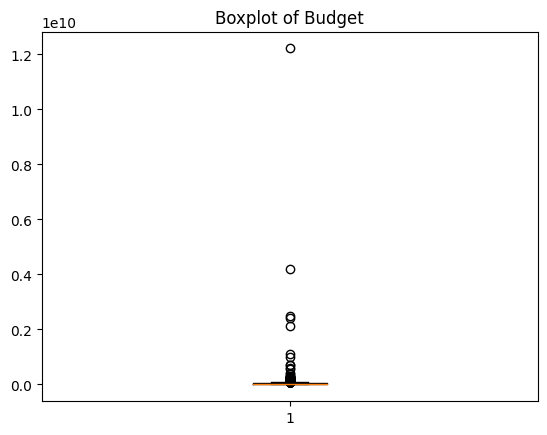

In [50]:
#show the grahp to see outlier for budget befor IQR
import matplotlib.pyplot as plt
plt.boxplot(movies_df_cleaned_encoded['budget'])
plt.title('Boxplot of Budget')
plt.show()



In [52]:

# We will use the interquartile range (IQR) method to detect outliers
# IQR_budget
Q1_budget = movies_df_cleaned_encoded['budget'].quantile(0.25)
Q3_budget = movies_df_cleaned_encoded['budget'].quantile(0.75)
IQR_budget = Q3_budget - Q1_budget


In [55]:
# IQR_gross
Q1_gross = movies_df_cleaned_encoded['gross'].quantile(0.25)
Q3_gross = movies_df_cleaned_encoded['gross'].quantile(0.75)
IQR_gross = Q3_gross - Q1_gross



In [56]:
# Define outlier criteria (values outside 1.5 * IQR range)
budget_outliers= (movies_df_cleaned_encoded['budget'] < (Q1_budget - 1.5 * IQR_budget)) | (movies_df_cleaned_encoded['budget'] > (Q3_budget + 1.5 * IQR_budget))
gross_outliers = (movies_df_cleaned_encoded['gross'] < (Q1_gross - 1.5 * IQR_gross)) | (movies_df_cleaned_encoded['gross'] > (Q3_gross + 1.5 * IQR_gross))



In [59]:
# Filter out outliers
movies_df_cleaned_encoded = movies_df_cleaned_encoded[~budget_outliers]
movies_df_cleaned_encoded = movies_df_cleaned_encoded[~gross_outliers]



<ipython-input-59-3821b264197a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies_df_cleaned_encoded = movies_df_cleaned_encoded[~gross_outliers]


In [60]:
# Check the shape of the data after removing duplicates and outliers
movies_df_cleaned_encoded.shape

(4182, 51)

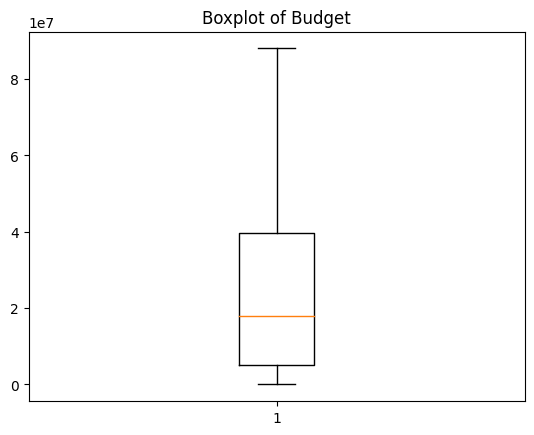

In [61]:
#show the grahp to see outlier for budget after IQR
import matplotlib.pyplot as plt
plt.boxplot(movies_df_cleaned_encoded['budget'])
plt.title('Boxplot of Budget')
plt.show()


In [62]:
# Step 5: Save the cleaned dataset to a CSV file
movies_df_cleaned_encoded.to_csv('movies_df_cleaned_encoded.csv', index=False)


In [65]:
movies_df_cleaned_encoded

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,genres_Musical,genres_Mystery,genres_News,genres_Romance,genres_Sci-Fi,genres_Short,genres_Sport,genres_Thriller,genres_War,genres_Western
84,Color,Roland Joffé,10.0,109.0,596.0,283.0,Alice Englert,622.0,4.846841e+07,Tamsin Egerton,...,False,False,False,False,False,False,False,False,False,False
98,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,4.846841e+07,Mark Chinnery,...,False,False,False,False,False,False,False,False,False,False
215,Color,John McTiernan,85.0,102.0,323.0,241.0,Vladimir Kulich,845.0,3.269479e+07,Tony Curran,...,False,False,False,False,False,False,False,False,False,False
242,Color,Frédéric Forestier,33.0,116.0,0.0,141.0,Santiago Segura,936.0,4.846841e+07,Alain Delon,...,False,False,False,False,False,False,False,False,False,False
306,Color,Peter Hyams,174.0,121.0,0.0,595.0,Mark Margolis,1000.0,6.686207e+07,CCH Pounder,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4.584000e+03,Kerry Bishé,...,False,False,False,False,False,False,False,False,False,False
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,4.846841e+07,Eric Mabius,...,False,False,False,False,False,False,False,False,False,False
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,4.846841e+07,Eva Boehnke,...,False,False,False,False,False,False,False,False,False,False
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,1.044300e+04,Alan Ruck,...,False,False,False,False,False,False,False,False,False,False
